# How to retrieve tco3 plots (jupyter)

This tutorial shows how to use a Jupyter notebook to retrieve data points of either **tco3_zm** plot or **tco3_return** plot in the JSON format and plot them. The Jupyter notebook can be downloaded from [here](https://git.scc.kit.edu/synergy.o3as/o3docs/-/blob/master/user/jupyter/o3api_plot_tco3.ipynb).

## System installations
If necessary, install required libraries or python packages 

In [1]:
### If needed, install additional modules:
#!pip3 install pandas
#!pip3 install matplotlib
### interactive plotting in jupyterlab requires node.js (pip does not install it!!):
#!apt update && apt install -y nodejs
#!pip3 install ipympl
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager
#!jupyter labextension install jupyter-matplotlib
#!jupyter nbextension enable --py widgetsnbextension
### DON'T FORGET TO RESTART JupyterLab !!
# start jupyterlab:
# jupyter lab --ip=0.0.0.0

## Import necessary packages
In this tutorial we need the following python packages:

[json](https://docs.python.org/3/library/json.html) - to decode JSON data

[matplotlib](https://matplotlib.org/) - to plot the data

[numpy](https://numpy.org/) and [pandas](https://pandas.pydata.org/) - to manipulate the data

[os](https://docs.python.org/3/library/os.html) - to manipulate URL paths

[requests](https://docs.python-requests.org/en/latest/) - to communicate with the O3as API and retrieve data

In [2]:
import json
import matplotlib.style as mplstyle
mplstyle.use('fast')
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests

## Define global variables
we set a few variables: e.g. the base URL of O3AS API and the default figure size 

In [3]:
# for interactive plot, may change to widget, if installed
%matplotlib inline

# Set default size of plots
plt.rcParams['figure.figsize'] = [12, 8]

# A few variables needed for every REST API call:
url_o3api = "http://api.o3as.fedcloud.eu/api/v1/"  # base URL of the O3as API
headers = {'Content-Type': 'application/json',
           'Accept': 'application/json'}

# Define Reference Measurement and Reference Year
refMeasurement = 'SBUV_GSFC_merged-SAT-ozone'
refYear = 1980

## Retrieve the list of models
We will analyse refC2 models, therefore we first request the list of corresponding models via the REST API

In [4]:
# Use '/models' API Endpoint, i.e. append "models" to the base url_o3api:
url_o3api_tco3_zm_models = os.path.join(url_o3api, "models")

# request the list of modesl from O3as API, select "refC2" models:
tco3_zm_models = requests.request("GET", 
                                  url=url_o3api_tco3_zm_models,
                                  params={'select': 'refc2'},
                                  headers=headers).json()
print(tco3_zm_models)

['CCMI-1_ACCESS_ACCESS-CCM-refC2', 'CCMI-1_CCCma_CMAM-refC2', 'CCMI-1_CESM1-CAM4Chem_refC2_r1i1p1', 'CCMI-1_CESM1-CAM4Chem_refC2_r2i1p1', 'CCMI-1_CESM1-CAM4Chem_refC2_r3i1p1', 'CCMI-1_CESM1-WACCM_refC2_r1i1p1', 'CCMI-1_CESM1-WACCM_refC2_r2i1p1', 'CCMI-1_CESM1-WACCM_refC2_r3i1p1', 'CCMI-1_CHASER-MIROC-ESM-refC2', 'CCMI-1_CNRM-CERFACS_CNRM-CM5-3-refC2', 'CCMI-1_CNRM-CERFACS_MOCAGE-refC2', 'CCMI-1_ETH-PMOD_SOCOL3-refC2', 'CCMI-1_GSFC_GEOSCCM-refC2', 'CCMI-1_MESSy_EMAC-L90MA-refC2', 'CCMI-1_MOHC_HadGEM3-ES-refC2', 'CCMI-1_MRI_ESM1r1-refC2', 'CCMI-1_NIES_CCSRNIES-MIROC3.2-refC2', 'CCMI-1_NIWA_NIWA-UKCA-refC2', 'CCMI-1_U-CAMBRIDGE_UMUKCA-UCAM-refC2', 'CCMI-1_U-LAQUILA_CCM-refC2', 'CCMI-1_U-LEEDS_UMSLIMCAT-refC2']


We also add a reference measurement, **refMeasurement** (defined above in the Global Variables, e.g. SBUV_GSFC_merged-SAT-ozone), to the list of models to be plotted

In [5]:
tco3_zm_models.append(refMeasurement)

## Request points of the tco3_zm plot
1.    we configure parameters of interest to get the plot. In the example we specify that we want a plot for:

*   Range of years: (1960, 2100)
*   month: September, October, November
*   South Hemisphere (SH, latitudes: -90, -60)
*   reference measurement: refMeasurement (e.g. SBUV_GSFC_merged-SAT-ozone)
*   reference year:  refYear (e.g. 1980, see Global Variables)

In [6]:
# initialize an empty dictionary
kwargs_tco3_zm = {}
 
# Build kwargs with tco3_zm parameters for O3as API. 
# Keys have to correspond to expected by the API keys!

kwargs_tco3_zm = {
    'begin'   : 1960,
    'end'     : 2100,
    'month'   : '9,10,11',
    'lat_min' : -90,
    'lat_max' : -60,
    'ref_meas': refMeasurement,
    'ref_year': refYear
}

2.  We want to retrieve "tco3_zm" plot: we use **'/plots'** endpoint, plot type 'tco3_zm', therefore we append 'plots/tco3_zm' to the base URL of the O3as API

3. Then we retrieve tco3_zm plot data for the parameters of interest and the list of refC2 models defined above







In [7]:
# Build the API URL, use /plots/tco3_zm endpoint:
url_o3api_plot_tco3_zm = os.path.join(url_o3api, "plots/tco3_zm")

# Request data
response = requests.request("POST",
                            url=url_o3api_plot_tco3_zm,
                            params=kwargs_tco3_zm,
                            headers=headers,
                            data=json.dumps(tco3_zm_models))
# print(response.request.url)  # uncomment if you like to see the API call
# print(response.request.body) # uncomment if you like to see the API call Request Body

# Read the status_code. Normal response => 200
print(response.status_code)
tco3_zm_data = response.json()
print(tco3_zm_data[:5])  # print first five for cross-checking

200
[{'legalinfo': 'https://o3as.data.kit.edu/policies/terms-of-use.html', 'model': 'CCMI-1_ACCESS_ACCESS-CCM-refC2', 'plotstyle': {'color': 'purple', 'linestyle': 'solid', 'marker': ''}, 'x': ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049', '2050', '2051', '2052', '2053', '2054', '2055', '2056', '2057', '2058', '2059', '2060'

4.  The received JSON data are converted into pandas Dataframe for an easier data manipulation

In [8]:
tco3_zm_pd = pd.json_normalize(tco3_zm_data)

5. Finally, we plot the retrieved data:

Text(0, 0.5, 'tco3_zm (DU)')

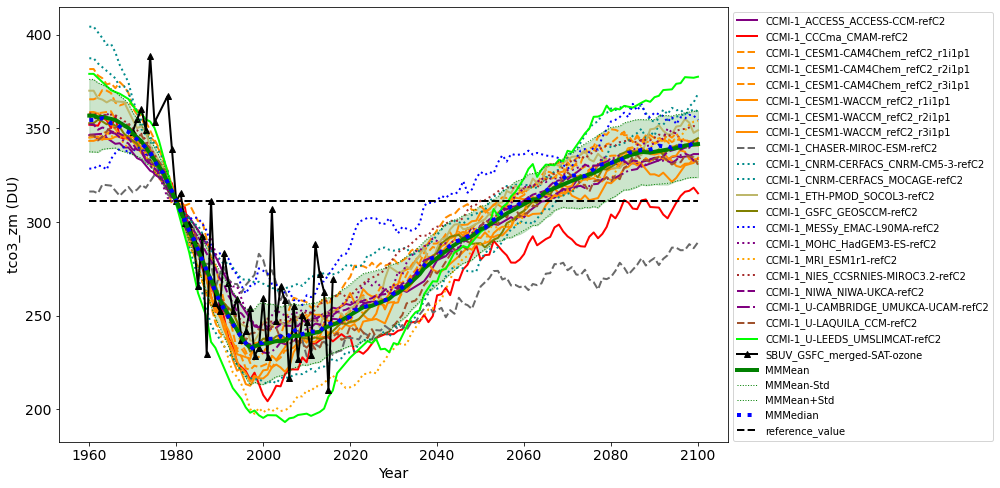

In [9]:
# set default linewidth:
linewidth_default = 2
tco3_zm_pd_plot = tco3_zm_pd.copy()

if not 'plotstyle.linewidth' in tco3_zm_pd_plot.columns:
  tco3_zm_pd_plot['plotstyle.linewidth'] = linewidth_default
else:
  tco3_zm_pd_plot['plotstyle.linewidth'] = tco3_zm_pd_plot['plotstyle.linewidth'].fillna(linewidth_default)

# plot every model
for index, c in tco3_zm_pd_plot.iterrows():
  plt.plot(pd.to_datetime(c['x']), c['y'], label=c['model'],
           color=c['plotstyle.color'], linestyle=c['plotstyle.linestyle'], 
           marker=c['plotstyle.marker'], linewidth=c['plotstyle.linewidth'])

# let's fill the area of (MMMean +/- 1 Std)
tco3_zm_mmmean_minus_std_pd = tco3_zm_pd_plot[tco3_zm_pd_plot['model']=='MMMean-Std']
tco3_zm_mmmean_plus_std_pd = tco3_zm_pd_plot[tco3_zm_pd_plot['model']=='MMMean+Std']

plt.fill_between(pd.to_datetime(tco3_zm_mmmean_minus_std_pd['x'].iloc[0]),
                 tco3_zm_mmmean_minus_std_pd['y'].iloc[0], 
                 tco3_zm_mmmean_plus_std_pd['y'].iloc[0], 
                 color='g', alpha=0.2);

# tune the plot
# show the legend
ax = plt.gca() # get axis instance
ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# put titels for axes
plt.xlabel('Year', fontsize='x-large')
plt.ylabel('tco3_zm (DU)', fontsize='x-large')

## Request points of the tco3_return plot
1. Similar to the previous task, we configure parameters of interest to get the **tco3_return** plot. In the example we specify that we want a plot for:

* month: September, October, November
* South Hemisphere (SH, latitudes: -90, -60)
* reference measurement: refMeasurement (e.g. SBUV_GSFC_merged-SAT-ozone, see Global Variables) 
* reference year: refYear (e.g. 1980, see Global Variables)
* we don't provide a specific range of years, like in the previous example, but use all available data

In [10]:
# initialize an empty dictionary
kwargs_tco3_return = {}
 
# Build kwargs with tco3_zm parameters for O3as API. 
# Keys have to correspond to expected by the API keys!

kwargs_tco3_return = {
    'month'   : '9,10,11',
    'lat_min' : -90,
    'lat_max' : -60,
    'ref_meas': refMeasurement,
    'ref_year': refYear
}

2. We want to retrieve "tco3_retrun" plot: we use '/plots' endpoint, plot type 'tco3_return', therefore we append 'plots/tco3_return' to the base URL of the O3as API

3. Then we retrieve tco3_retrun plot data for the parameters of interest and the list of refC2 models defined above (this time we exclude the reference measurement)

In [11]:
# Build the API URL, use /plots/tco3_return endpoint:
url_o3api_plot_tco3_return = os.path.join(url_o3api, "plots/tco3_return")

# Request data
response = requests.request("POST",
                            url=url_o3api_plot_tco3_return,
                            params=kwargs_tco3_return,
                            headers=headers,
                            data=json.dumps(tco3_zm_models))
# Read the status_code. Normal response => 200
print(response.status_code)
tco3_return_data = response.json()
print(tco3_return_data[:5])  # print first five for cross-checking

200
[{'legalinfo': 'https://o3as.data.kit.edu/policies/terms-of-use.html', 'model': 'CCMI-1_ACCESS_ACCESS-CCM-refC2', 'plotstyle': {'color': 'purple', 'linestyle': 'none', 'marker': 'o'}, 'x': ['Antarctic(Oct)', 'SH mid-lat', 'Tropics', 'NH mid-lat', 'Arctic(Mar)', 'Near global', 'Global', 'User region'], 'y': [2064, 2051, 2060, 2041, 2040, 2049, 2052, 2065]}, {'legalinfo': 'https://o3as.data.kit.edu/policies/terms-of-use.html', 'model': 'CCMI-1_CCCma_CMAM-refC2', 'plotstyle': {'color': 'red', 'linestyle': 'none', 'marker': 'x'}, 'x': ['Antarctic(Oct)', 'SH mid-lat', 'NH mid-lat', 'Arctic(Mar)', 'Near global', 'Global', 'User region'], 'y': [2087.0, 2049.0, 1986.0, 1986.0, 2045.0, 2048.0, 2083.0]}, {'legalinfo': 'https://o3as.data.kit.edu/policies/terms-of-use.html', 'model': 'CCMI-1_CESM1-CAM4Chem_refC2_r1i1p1', 'plotstyle': {'color': 'darkorange', 'linestyle': 'none', 'marker': 'd'}, 'x': ['Antarctic(Oct)', 'SH mid-lat', 'Tropics', 'NH mid-lat', 'Arctic(Mar)', 'Near global', 'Global'

4. The received JSON data can be converted into pandas Dataframe for an easier data manipulation

In [12]:
tco3_return_pd = pd.json_normalize(tco3_return_data)

5. Finally, we plot the retrieved data:

Text(0, 0.5, 'tco3_zm (DU)')

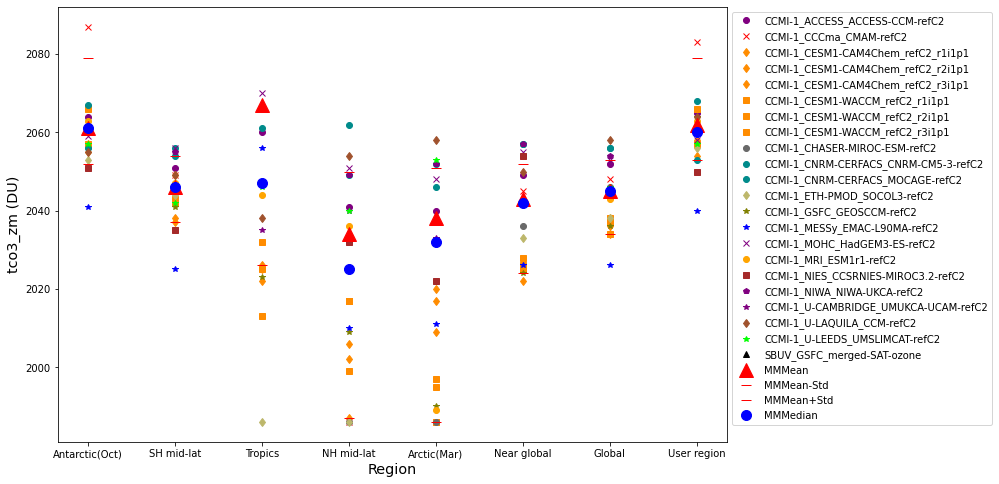

In [13]:
# set default markersize:
markersize_default = 6
tco3_return_pd_plot = tco3_return_pd.copy()

if not 'plotstyle.markersize' in tco3_return_pd_plot.columns:
  tco3_return_pd_plot['plotstyle.markersize'] = markersize_default
else:
  tco3_return_pd_plot['plotstyle.markersize'] = tco3_return_pd_plot['plotstyle.markersize'].fillna(markersize_default)

# plot every model
for index, c in tco3_return_pd_plot.iterrows():
  plt.plot(c['x'], c['y'], label=c['model'],
           color=c['plotstyle.color'], linestyle=c['plotstyle.linestyle'], 
           marker=c['plotstyle.marker'], markersize=c['plotstyle.markersize'])

# show the legend
ax = plt.gca() # get axis instance
ax.legend(bbox_to_anchor=(1.0, 1.0))

# put titels for axes
plt.xlabel('Region', fontsize='x-large')
plt.ylabel('tco3_zm (DU)', fontsize='x-large')